In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [3]:
outDir = 'allfilters_test'
!ls $outDir/*npz

allfilters_test/enigma_1189_CoaddM5_g_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_g_Dithered_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_g_HEAL.npz          allfilters_test/enigma_1189_Nvisits_g_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_i_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_i_Dithered_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_i_HEAL.npz          allfilters_test/enigma_1189_Nvisits_i_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_r_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_r_Dithered_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_r_HEAL.npz          allfilters_test/enigma_1189_Nvisits_r_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_u_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_u_Dithered_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_u_HEAL.npz          allfilters_test/enigma_1189_Nvisits_u_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_y_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_y_Dithered_HEAL.npz
allfilters_test/enigma_1189_

In [4]:
myBundles = {}
filterlist = ('u', 'g', 'r', 'i', 'z', 'y')
for f in filterlist:
    # Create an empty metric bundle, which we will use to read the data.
    myBundles[f] = metricBundles.emptyMetricBundle()
    myBundles[f].read('allfilters_test/enigma_1189_CoaddM5_' + f + '_HEAL.npz')
    myBundles[f+'_dithered'] = metricBundles.emptyMetricBundle()
    myBundles[f+'_dithered'].read('allfilters_test/enigma_1189_CoaddM5_' + f + '_Dithered_HEAL.npz')

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [5]:
plotOutDir = 'allfilters_test_plots'
!mkdir $plotOutDir
ph = plots.PlotHandler(outDir = plotOutDir)

mkdir: allfilters_test_plots: File exists


1

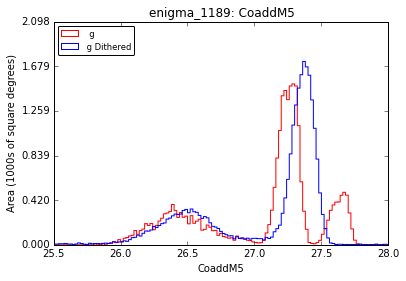

In [6]:
# Make histogram of g dithered and non-dithered
ph.setMetricBundles([myBundles['g'], myBundles['g_dithered']])
updatePlotDict = {'xMin':25.5, 'xMax':28, 'binsize':0.02, 'legendloc':'upper left', 'colors':['r', 'b']}
ph.plot(plots.HealpixHistogram(), plotDict=updatePlotDict)

In [7]:
# Calculate the mean, median and RMS for all metricBundles. 
summaryMetrics = [metrics.MeanMetric(), metrics.MedianMetric(), metrics.RmsMetric()]
for mB in myBundles.itervalues():
    mB.setSummaryMetrics(summaryMetrics)
    mB.computeSummaryStats()

In [8]:
# Add these values to the plot labels. 
for mB in myBundles.itervalues():
    updatePlotDict = {'label':'%8s - Mean: %.2f, Med: %.2f, Rms: %.2f' %(mB.metadata[:6], 
                                                                        mB.summaryValues['Mean'],
                                                                        mB.summaryValues['Median'],
                                                                        mB.summaryValues['Rms'])}
    mB.setPlotDict(updatePlotDict)

1

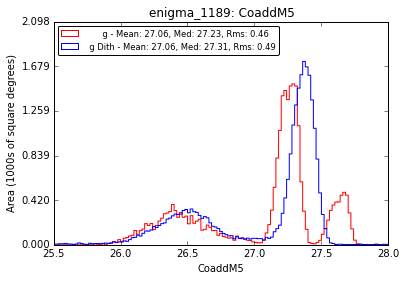

In [9]:
updatePlotDict = {'xMin':25.5, 'xMax':28, 'binsize':0.02, 'legendloc':'upper left', 'colors':['r', 'b']}
ph.plot(plots.HealpixHistogram(), plotDict=updatePlotDict)

2

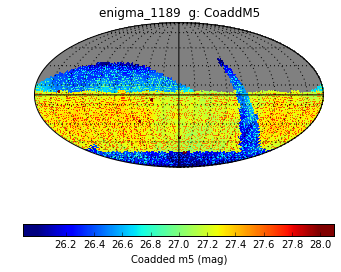

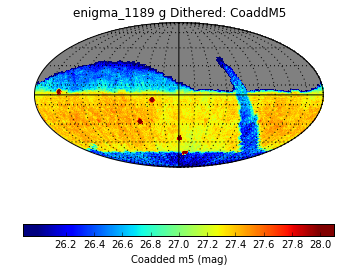

In [10]:
# Plot the coadded depth on the sky, non-dithered.
ph.setMetricBundles([myBundles['g']])
updatePlotDict = {'colorMin':26, 'colorMax':28, 'xlabel':'Coadded m5 (mag)'}
ph.plot(plots.HealpixSkyMap(), plotDict=updatePlotDict)
# Plot the coadded depth on the sky, dithered.
ph.setMetricBundles([myBundles['g_dithered']])
updatePlotDict = {'colorMin':26, 'colorMax':28, 'xlabel':'Coadded m5 (mag)'}
ph.plot(plots.HealpixSkyMap(), plotDict=updatePlotDict)

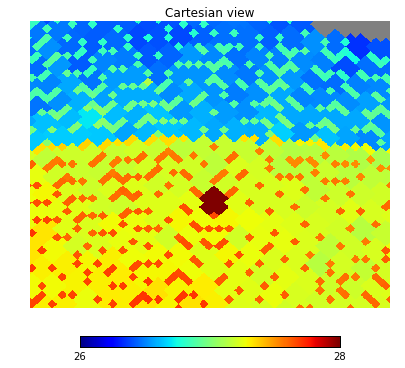

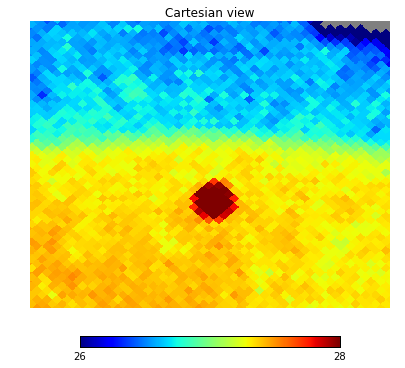

In [11]:
# Zoom in.
import healpy as hp
# Use the metricBundle (masked numpy array) metric data values directly.
hp.cartview(myBundles['g'].metricValues, lonra=[10, 60], latra=[-20, 20], min=26., max=28., flip='astro')
hp.cartview(myBundles['g_dithered'].metricValues, lonra=[10, 60], latra=[-20, 20], min=26., max=28., flip='astro')

/Users/lynnej/anaconda/lib/python2.7/site-packages/healpy/pixelfunc.py:256: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/lynnej/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:2200: RuntimeWarning: invalid value encountered in less_equal
  condition = umath.less_equal(mabs(xnew - value), atol + rtol * mabs(value))
/Users/lynnej/anaconda/lib/python2.7/site-packages/healpy/projaxes.py:996: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/lynnej/anaconda/lib/python2.7/site-packages/healpy/projaxes.py:997: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


1

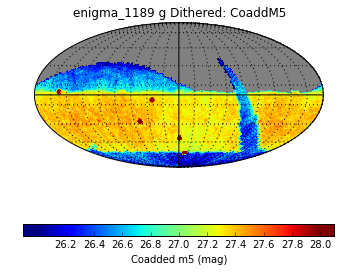

In [12]:
# Mask areas where dithering spread visits out into added area.
# Identify those areas (using the mask on the non-dithered metrics)
for f in filterlist:
    myBundles[f+'_dithered'].metricValues.mask = myBundles[f].metricValues.mask
updatePlotDict = {'colorMin':26, 'colorMax':28, 'xlabel':'Coadded m5 (mag)'}
ph.setMetricBundles([myBundles['g_dithered']])
ph.plot(plots.HealpixSkyMap(), plotDict=updatePlotDict)

/Users/lynnej/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


1

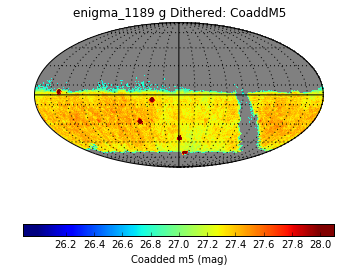

In [19]:
# We could even mask areas where the depth falls below X percentile. 
newSummaryMetric = [metrics.PercentileMetric(percentile=10, metricName='cutoff')]
for f in filterlist:
    k = f + '_dithered'
    myBundles[k].setSummaryMetrics(newSummaryMetric)
    myBundles[k].computeSummaryStats()
    mask = np.where(myBundles[k].metricValues < myBundles[k].summaryValues['cutoff'])[0]
    myBundles[k].metricValues.mask[mask] = True
ph.setMetricBundles([myBundles['g_dithered']])
ph.plot(plots.HealpixSkyMap(), plotDict=updatePlotDict)

monopole: 26.2594  dipole: lon: 145.138, lat: -31.5551, amp: 0.0571019
monopole: 27.2914  dipole: lon: 135.334, lat: -62.4162, amp: 0.115884
monopole: 27.4226  dipole: lon: 144.867, lat: -84.0911, amp: 0.121042
monopole: 26.7566  dipole: lon: -124.35, lat: -14.327, amp: 0.0624656
monopole: 25.4421  dipole: lon: -21.0552, lat: -72.8334, amp: 0.0957723
monopole: 24.472  dipole: lon: 121.97, lat: -64.8111, amp: 0.0430128
monopole: 26.2078  dipole: lon: 107.842, lat: 56.8899, amp: 0.409452
monopole: 27.0102  dipole: lon: 169.794, lat: -78.7655, amp: 0.153593
monopole: 27.1379  dipole: lon: 84.5111, lat: 29.0736, amp: 0.053101
monopole: 26.473  dipole: lon: 90.0548, lat: 82.6487, amp: 0.0744564
monopole: 25.2538  dipole: lon: -16.3767, lat: -46.4422, amp: 0.0709537
monopole: 24.4738  dipole: lon: 93.5119, lat: 67.7959, amp: 0.58071


1

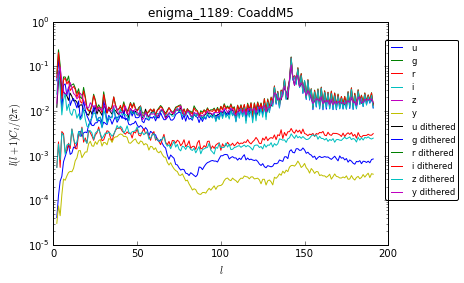

In [30]:
bundleList = []
updatePlotDict = {'labels':[]}
for f in filterlist:
    bundleList.append(myBundles[f])
    updatePlotDict['labels'].append(f)
for f in filterlist:
    bundleList.append(myBundles[f+'_dithered'])
    updatePlotDict['labels'].append(f+' dithered')
updatePlotDict['legendloc'] = (0.99, 0.2)
ph.setMetricBundles(bundleList)
ph.plot(plots.HealpixPowerSpectrum(), plotDict=updatePlotDict)